# Multivariate data as vectors

We have done univariate analysis in the previous notebooks. All the datasets we have looked into so far were multivariate but we focused on analyzing individual variables, performing basic descriptive and inferential statistics. Afterwards, we did some bivariate analysis. However, what if you wanted to analyze more than 2 variables at once?

Multivariate data can have 2 or more dimensions. Often, more than 1 variable is collected in an experiment or any observation. When considering multivariate data, we must take into account interdependencies and correlations of data vectors. 

For example, in the demographic study - many features such as age, sex, race, education, job, income level, etc are included in the survey. The datasets will have more than 2 quanititative variables for each row/observation. 

A key issue to address is that with increasingly wide datasets, it becomes increasingly more challenging to do visual exploration of the data. Visual exploration is possible when looking at a dataset of 2, 3, 4 variables as shown in the lecture/videos but anything beyond this range should be dealt with using numerical analysis. 

## What is a vector?

The word vector is the name that approximates the meaning of the term, "variable". Data scientists often use the four following words interchangably while communicating to others: variable, vector, array, and distribution. When multiple vectors (variables) are combined and stored into a dataset in R, we call it a dataframe. 

When R stores vectors into a dataframe, it assigns a role to indicate how the data will be used in subsequent statistical analysis. So in R dataframes, the "logical", "datetime", and "character" datatypes are assigned the role of factor. The "double datatype are assigned the role of num and integers are assigned the role of int (the complex datatype is assigned the role of cpix). These roles correspond to statistical datatypes as follows:

* Factor = nominal
* int = ordinal
* num = interval 

So every variable or distribution or array is a vector. Additionally, every dataum within a dataset is typically a vector of related values.

## Bivariate data

Measures of central tendency, variability, and spread summarize a single variable by providing important information about its distribution. Before discussing multivariate data, let's recap bivariate data. As you will recall, bivariate analysis consist of 2 quantitative variables. It is analogous to summarizing univariate (single variable) data. 

Consider the analysis of abdominal circumference vs gestation period. Let's begin by asking if the abdominal circumference varies with gestation period. From experience, we can say it's true. But how good is the correlation? One way to address the question is to look at the abdominal circumference against gestation period for a sample of the data. 

In [9]:
ac_data = read.csv("datasets/ac.csv")
ac_data = ac_data[,2:ncol(ac_data)]
head(ac_data)

gawks,ac
12.28571,59
12.28571,64
12.28571,56
12.42857,61
12.71429,74
12.71429,60


Going across the columns, we see that babies with higher gestation periods tend to have higher abdominal circumference than babies with lower gestation periods but this is not true in all cases. The data reflects our experience but the expectation is not always the case. 

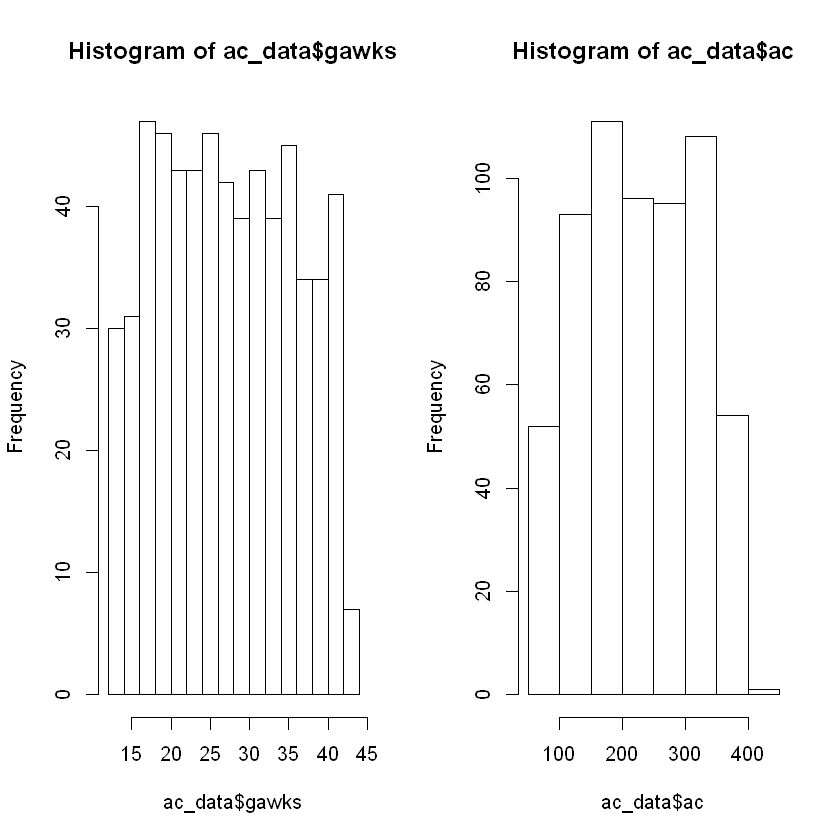

In [10]:
par(mfrow = c(1, 2))
hist(ac_data$gawks)
hist(ac_data$ac)

Here are the means and standard deviations

In [11]:
summary(ac_data)

     gawks             ac       
 Min.   :12.29   Min.   : 56.0  
 1st Qu.:20.00   1st Qu.:153.0  
 Median :27.00   Median :227.0  
 Mean   :27.27   Mean   :226.7  
 3rd Qu.:34.43   3rd Qu.:303.8  
 Max.   :42.43   Max.   :404.0  

In [12]:
sd(ac_data$gawks)

[1] 8.457582

In [13]:
sd(ac_data$ac)

[1] 88.64885

We can see that not all babies with a longer gestation period have a larger abdominal circumference. This relationship can't be seen when we separate the variables. We cannot answer questions based on means or standard deviations alone. For example, based on means alone, we can't answer what percentage of babies have an abdominal circumference greater than 300. We'd have to count across the pairs to find out. 

Another example where information is not available from the separate descriptions of gestation period and abdominal circumference is the mean gestation period of babies with certain abdominal circumference. 

Finally, we also don't know the relationship between gestation period and abdominal circumference. 

We can learn more by displaying the bivariate data in graphical form that maintains the pairing as shown below. The x-axis represents the gestation period of babies and the y-axis has abdominal circumference. 

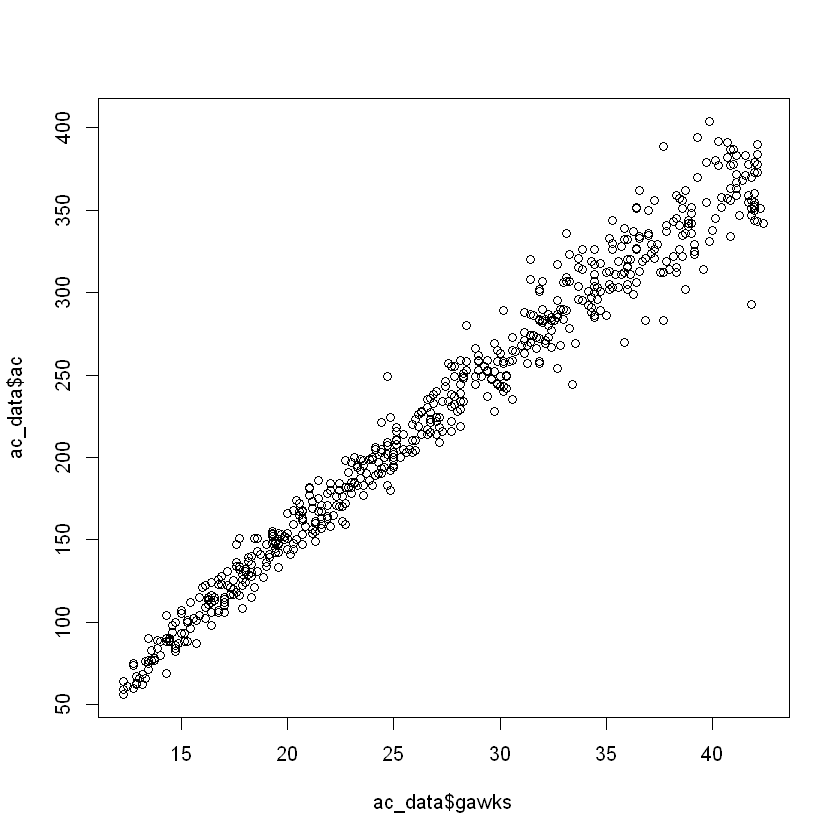

In [14]:
plot(ac_data$gawks, ac_data$ac)

There are 2 important characteristics of data revealed from the above plot. First, there is a strong relationship between gestation period and ab circumference. The long the gestation period, the greater the circumference. 

When one variable (y) increases with the second variable (x), we say that x and y have a positive association. 

Notice how the points are clustered along a straight line. This relationship is called a linear relationship. 

Scatterplots that show linear relationships between variables can differ in several ways including the slope of the line about which they cluster and how tightly the points cluster about the line. A statistical measure of the strength of the relationship between 2 quantitative variables that takes these factors into accoutn is Peason's Correlation or simply known as the correlation coefficient. 

Let's dive in covariance first

## Covariance

The covariance of 2 variables x and y in a datset measures how the 2 are linearly related. It's similar to variance, where the variance tells you how a single variable varies but the covariance tells you how 2 variables vary together. 

A positive covariance would indicate positive linear relationship between the variables and a negative covariance would indicate the opposite. 

In [15]:
cov(ac_data$gawks, ac_data$ac)

[1] 739.4914

### Why do we need to estimate correlation?

The problem with covariances is that they are hard to compare. For example, when you calculate the covariance of a set of heights and weights, as expressed in meters and kilogrames respectively, you will get a difference covariance from when you do it in other units. 

Additionally, it will be hard to tell if the height and weight covary better than the legnth of toes and fingers....simply because the scale you calculate the covariance is different. 

The solution to this is to normalize the covariance. The covariance is divided by something that represents the diversity and scale in both covariates, and you end up with a value between -1 and 1, which is the correlation coefficient. 

Whatever unit you original variables were in, normalizing the covariance between -1 and 1 means tghat you can, to a certain degree, compare whether 2 variables correlate more than the other sets of 2 variables, simply by comparing their correlation coefficient. 

If the relationship between the variables is not linear, then the correlation coefficient does not adequately represent the strengt of the relationship between the variables. The symbol for Pearson's correlation is $\rho$ when it is measure in the population and "r" when it is measured in a sample. 

Pearson's r can range from -1 to 1. 

In [17]:
cor(ac_data, use = "pairwise.complete.obs", method = "pearson")

,gawks,ac
gawks,1.0000000,0.9863109
ac,0.9863109,1.0000000


#### Properties of pearson R:

* Pearson's correlation is symmetric in the sense that the correlation of X and Y is the same as the correlation of Y with X. 
* A critical property of Person's r is that it is unaffected by linear transformations. This means that multiplying a variable by a constant and/or adding a constant does not change the correlation of that variable with other variables. For instance, the correlation of weight and height does not depend on whether height is measured in inches, feet, or even miles. Similarly, add 5 points to every student's test score would not change the correlation of the test score with other variables such as GPA. 

Pearson's r is designed so that the correlation between variables is the same no matter what units they are measured in. To acheive this property, Pearson's correlation is computed by dividing the sum of the xy column by the square root of the product of the sum. 

## Visual vector compared to scalar value

A vector can be analyzed using visuals and scalar values. The plot below shows the distribution of gestation period values with the mean highlighted in red. A scalar value: 27.266 for mean would give less information against the visual of the vecotr. 

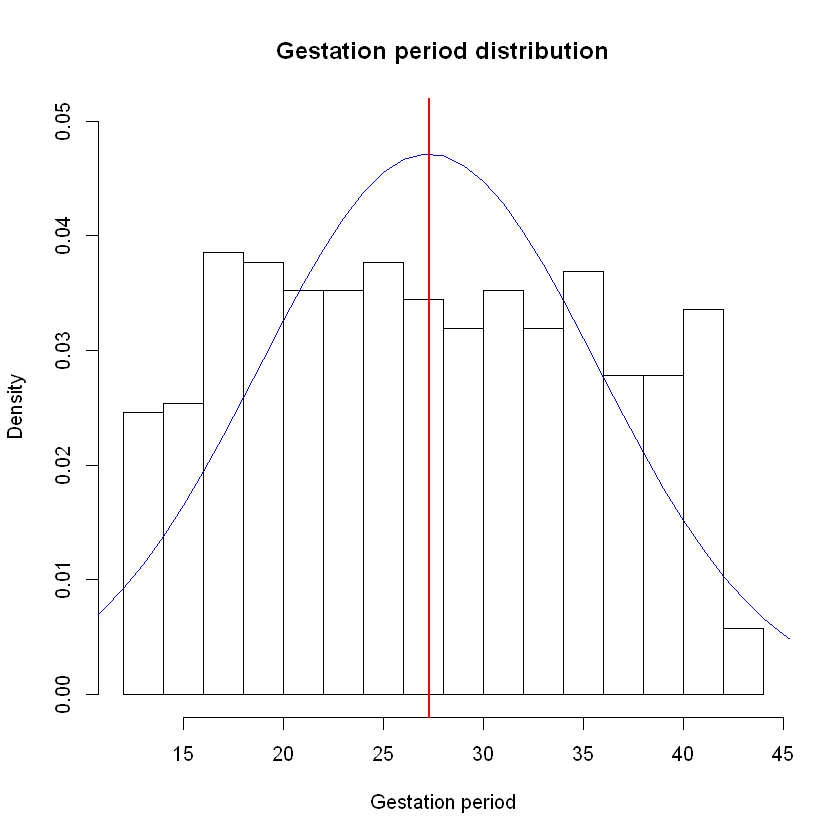

In [19]:
x <- 0:50

hist(ac_data$gawks, probability = TRUE, 
     main = "Gestation period distribution",
     xlab = "Gestation period", 
     ylab = "Density", 
     ylim = (c(0, 0.05))
    )

y <- dnorm(x = x, mean = mean(ac_data$gawks), 
          sd = sd(ac_data$gawks))

lines(x = x, y = y, col = "blue")
abline(v = mean(ac_data$gawks), col = "red", lwd = 2)

### Why do we need vectors?

Nearly everything in mathematical modelling is a vector in one way or another. Vectors can have any number of dimensions. In the prior module, we were looking at 1 dimensional vectors but they can have hundreds, thousand, or occasionally millions of dimensions. 

Some examples of vectors are: stock indices, images, videos, audio signals, probability densities. In fact, almost anything called a distribution, GPS solutions, and survey responses on scales are all vectors. 

One dimensional vectors look like plain old numbers. They explain why real numbers have signs (like directions). 

In most data science problems, you have a dataset in the form of m rows and n columns where each row is a datum, point, or observation and each column is a feature/attribute. 

The dataset is then a m x n matrix and you can represent it in many different ways. You can approximate any point in your data as a linear combination of some vectors or as a base of a vector space. The choice of base depends on the problem you are trying to solve since different algos create different base. For example, algos such as SVD/PCA, NMF, and K-means will create different bases. 